In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [ ]:
california = pd.read_parquet("datasets/reviews_parquet/california_reviews.parquet")
florida = pd.read_parquet("datasets/reviews_parquet/florida_reviews.parquet")
illinois = pd.read_parquet("datasets/reviews_parquet/illinois_reviews.parquet")
newyork = pd.read_parquet("datasets/reviews_parquet/nuevayork_reviews.parquet")
texas = pd.read_parquet("datasets/reviews_parquet/texas_reviews.parquet")
washington = pd.read_parquet("datasets/reviews_parquet/washington_reviews.parquet")

In [33]:
california["state"] = "California"
florida["state"] = "Florida"
illinois["state"] = "Illinois"
newyork["state"] = "New_York"
texas["state"] = "Texas"
washington["state"] = "Washington"

In [34]:
google_reviews = pd.concat([california,florida,illinois,newyork,texas,washington],axis=0)
google_reviews = google_reviews.reset_index(drop=True)

In [95]:
google_reviews = pd.read_parquet("datasets/google_reviews.parquet")

In [35]:
google_reviews

,name,time,rating,text,gmap_id,date,state
0,Song Ro,05:12:07,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-01-06,California
1,Rafa Robles,05:47:28,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-02-09,California
2,David Han,05:04:42,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020-03-08,California
3,Anthony Kim,05:56:56,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019-03-07,California
4,Mario Marzouk,05:01:41,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017-05-16,California
...,...,...,...,...,...,...,...
14191627,Prasad G,19:44:51,5,Nice place to visit.,0x54905fc9357076eb:0xb98c4d55e9204118,2019-08-26,Washington
14191628,Preet Kamal Singh,15:59:53,5,Best pizza in town,0x54905fc9357076eb:0xb98c4d55e9204118,2019-10-08,Washington
14191629,jatt putt,05:37:30,5,Best pizza I love it,0x54905fc9357076eb:0xb98c4d55e9204118,2019-02-17,Washington
14191630,Frank Evans,10:22:36,5,Bam,0x54905fc9357076eb:0xb98c4d55e9204118,2019-08-30,Washington


In [37]:
google_reviews['date'] = pd.to_datetime(google_reviews['date'])
google_reviews['year'] = google_reviews['date'].dt.year

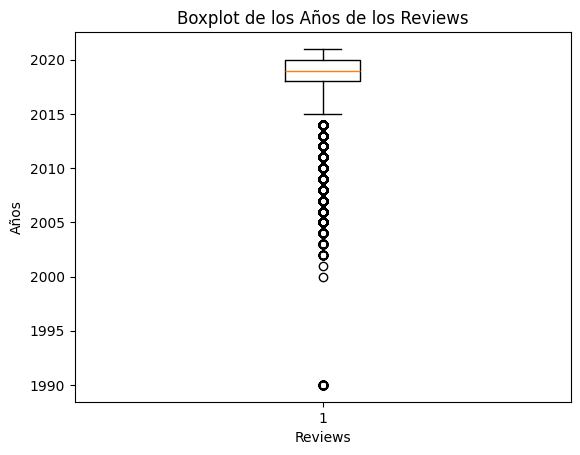

In [40]:
plt.boxplot(google_reviews['year'])
plt.title('Boxplot de los Años de los Reviews')
plt.ylabel('Años')
plt.xlabel('Reviews')
plt.show()

In [18]:
print(google_reviews['date'].dt.year.min())
print(google_reviews['date'].dt.year.max())

1990
2021


In [22]:
Q1 = google_reviews['date'].dt.year.quantile(0.25)
Q3 = google_reviews['date'].dt.year.quantile(0.75)
IQR = Q3 - Q1

# Determinar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los registros que son outliers en los años
outliers = google_reviews[(google_reviews['year'] < lower_bound) | (google_reviews['year'] > upper_bound)]


# Contar los registros por cada año outlier
outliers_count = outliers['year'].value_counts().reset_index()
outliers_count.columns = ['year', 'count']

# Mostrar el resultado
print(outliers_count)

    year  count
0   2014  48309
1   2013  34518
2   2012  19491
3   2011  15988
4   2010   5557
5   2009    768
6   2008    417
7   2007    251
8   2006    229
9   2005    207
10  2004     99
11  2003     52
12  1990     44
13  2002     26
14  2001      1
15  2000      1


### Interpretación de los Resultados

1. Distribución Temporal de Reviews:

* La mayor concentración de outliers se encuentra en los años más recientes (2014-2011), con un número considerable de reviews también en los años inmediatamente anteriores (2010-2005).
* La disminución significativa de reviews a medida que retrocedemos en el tiempo (2004 y anteriores) sugiere que la mayoría de los reviews se han acumulado en los últimos años.

2. Años Recientes con Alta Actividad:

* Los años con la mayor cantidad de reviews (2014 y 2013) indican una alta actividad de revisión en esos años, lo que puede correlacionarse con un aumento en la popularidad del uso de Google Maps y su función de reviews.
* Estos años también pueden reflejar un crecimiento de nuevos locales como restaurantes, ya que los consumidores comparten más activamente sus experiencias.

3. Años con Menos Reviews (2000-2007):

* La baja cantidad de reviews en estos años puede reflejar varias cosas:
    * Adopción Tardía de la Tecnología: En esos años, el uso de plataformas como Google Maps para reviews era menos común.
    * Disponibilidad de Datos: Es posible que Google Maps no tuviera una función robusta de reviews en esos años o que los datos disponibles se hayan registrado más tarde.
    * Revisión Retroactiva: Algunos reviews pueden haber sido añadidos retroactivamente a años más antiguos, lo que explicaría la presencia de reviews en esos años.

4. Años Muy Antiguos (Antes de 2000):

* Los pocos registros en años como 1990, 2001 y 2000 probablemente no sean significativos y podrían ser errores de entrada de datos, ya que la función de reviews de Google Maps no existía en esos momentos. Estos pueden representar registros anómalos o mal ingresados.

### Implicaciones para el Estudio de Mercado

1. Popularidad Reciente de la Revisión Online:

* La alta cantidad de reviews en los años más recientes (2011-2014) indica que la revisión en línea se ha vuelto cada vez más importante para los consumidores. Los inversores deben considerar la fuerte influencia de las reviews en línea en la reputación y el éxito de un restaurante.

2. Evolución del Comportamiento del Consumidor:

* El aumento progresivo en el número de reviews hasta 2014 sugiere que los consumidores están más dispuestos a compartir sus experiencias en línea. Esto puede ser una señal de que invertir en la presencia en línea y la gestión de la reputación es crucial para los nuevos negocios.

3. Oportunidades de Mercado en Nuevas Áreas:

* Si se observan patrones de reviews concentrados en ciertos años y áreas, esto podría indicar tendencias de crecimiento o declive en diferentes localidades. Los inversores pueden usar esta información para identificar áreas geográficas o periodos de tiempo con alta actividad de consumidores y ajustar sus estrategias en consecuencia.

4. Importancia de la Historia Reciente:

* La falta de reviews en años anteriores a 2000 y la baja actividad hasta 2007 destaca la importancia de los datos más recientes para tomar decisiones de inversión. Los inversores deberían centrarse más en las tendencias de los últimos años, ya que reflejan mejor el mercado actual.

5. Validación de Datos:

* La presencia de reviews en años improbables como 1990 sugiere la necesidad de una revisión de calidad de los datos. Asegurarse de que los datos de reviews son precisos y relevantes es esencial para un análisis fiable.

### Recomendaciones para los Inversores

1. Enfocarse en la Presencia en Línea:
* Los inversores deben asegurarse de que los nuevos restaurantes tengan una fuerte presencia en línea y gestionen activamente sus reviews, dado el aumento de la importancia de las reviews de Google Maps en la última década.

2. Analizar Tendencias Recientes:
* Las tendencias de los últimos 5-10 años son las más relevantes para entender el comportamiento del consumidor y la competitividad en el mercado. Esto puede guiar decisiones sobre la ubicación, tipo de cocina y estrategias de marketing.

3. Explorar Oportunidades en Áreas con Alta Actividad:
* Identificar áreas geográficas con un alto número de reviews recientes puede ayudar a localizar mercados potencialmente lucrativos o áreas en expansión.

4. Gestionar la Reputación:
* La reputación en línea es fundamental. Invertir en servicios de gestión de reputación y en la calidad de la experiencia del cliente puede ser una estrategia clave para atraer y retener clientes.

### Conclusión
El análisis de outliers en los años de los reviews proporciona una visión profunda sobre cómo los patrones de revisión han evolucionado con el tiempo y cómo esto puede influir en las decisiones de inversión en el sector gastronómico o a fines. Al enfocarse en las tendencias recientes y la gestión activa de la reputación en línea, los inversores pueden maximizar sus oportunidades en el mercado competitivo de restaurantes en EE.UU.

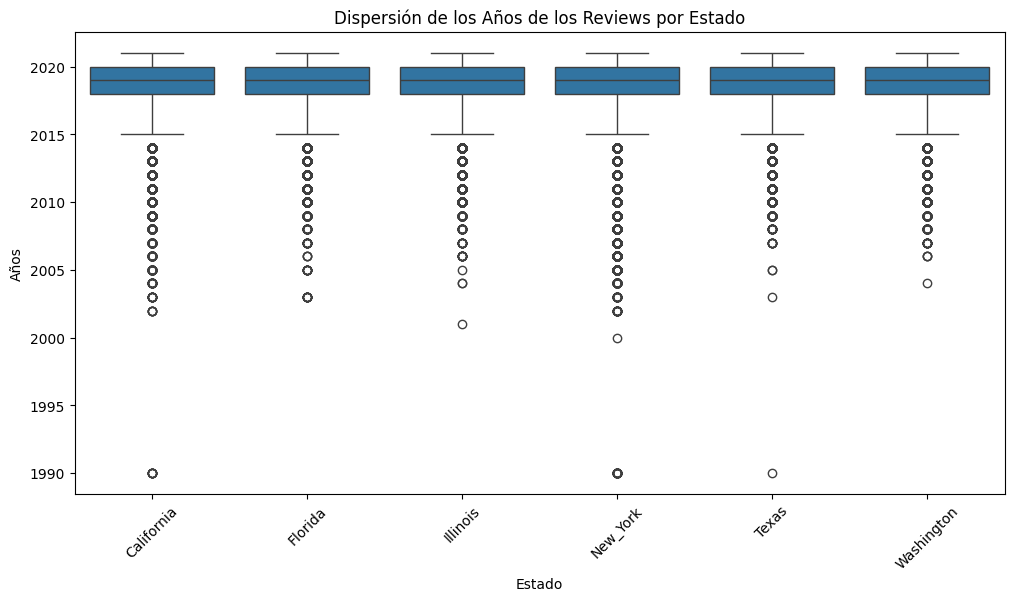

In [42]:
# Crear el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='year', data=google_reviews)

# Ajustar el título y las etiquetas
plt.title('Dispersión de los Años de los Reviews por Estado')
plt.xlabel('Estado')
plt.ylabel('Años')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

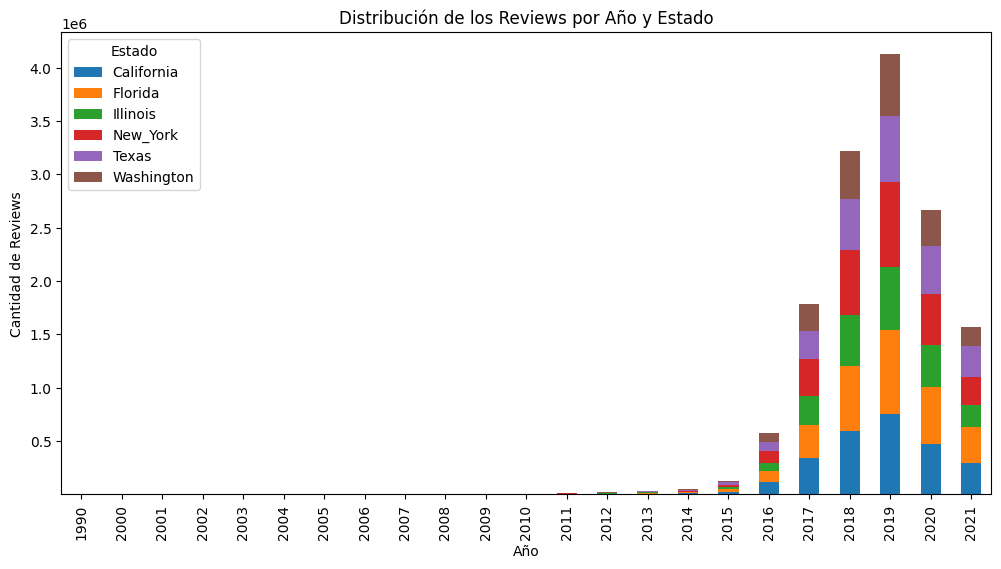

In [43]:
reviews_per_year_state = google_reviews.groupby(['year', 'state']).size().unstack().fillna(0)

# Crear el histograma apilado
reviews_per_year_state.plot(kind='bar', stacked=True, figsize=(12, 6))

# Ajustar el título y las etiquetas
plt.title('Distribución de los Reviews por Año y Estado')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')
plt.legend(title='Estado')

# Mostrar el gráfico
plt.show()

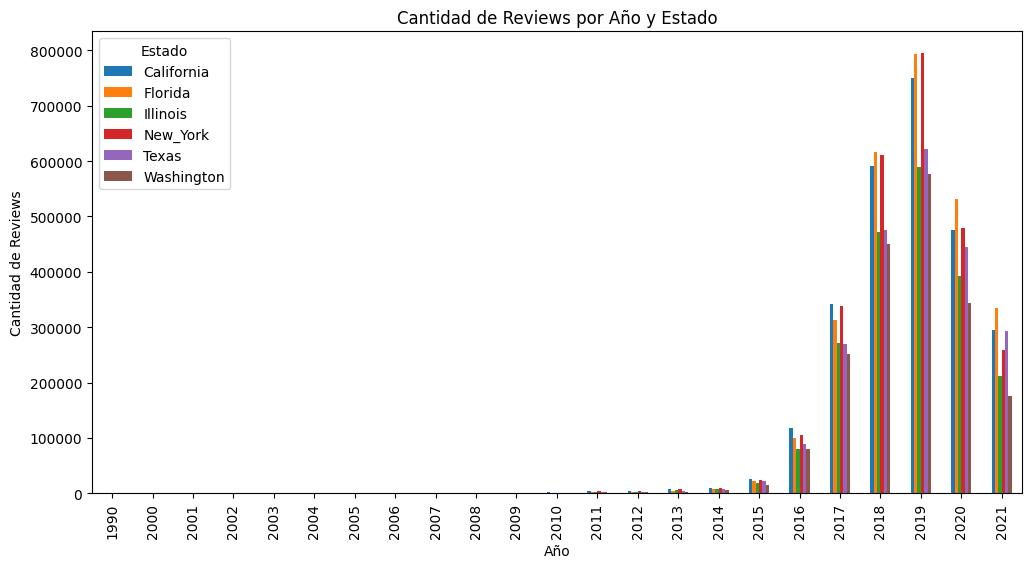

In [44]:
reviews_per_year_state = google_reviews.groupby(['year', 'state']).size().unstack().fillna(0)

# Crear el gráfico de barras
reviews_per_year_state.plot(kind='bar', figsize=(12, 6))

# Ajustar el título y las etiquetas
plt.title('Cantidad de Reviews por Año y Estado')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')
plt.legend(title='Estado')

# Mostrar el gráfico
plt.show()

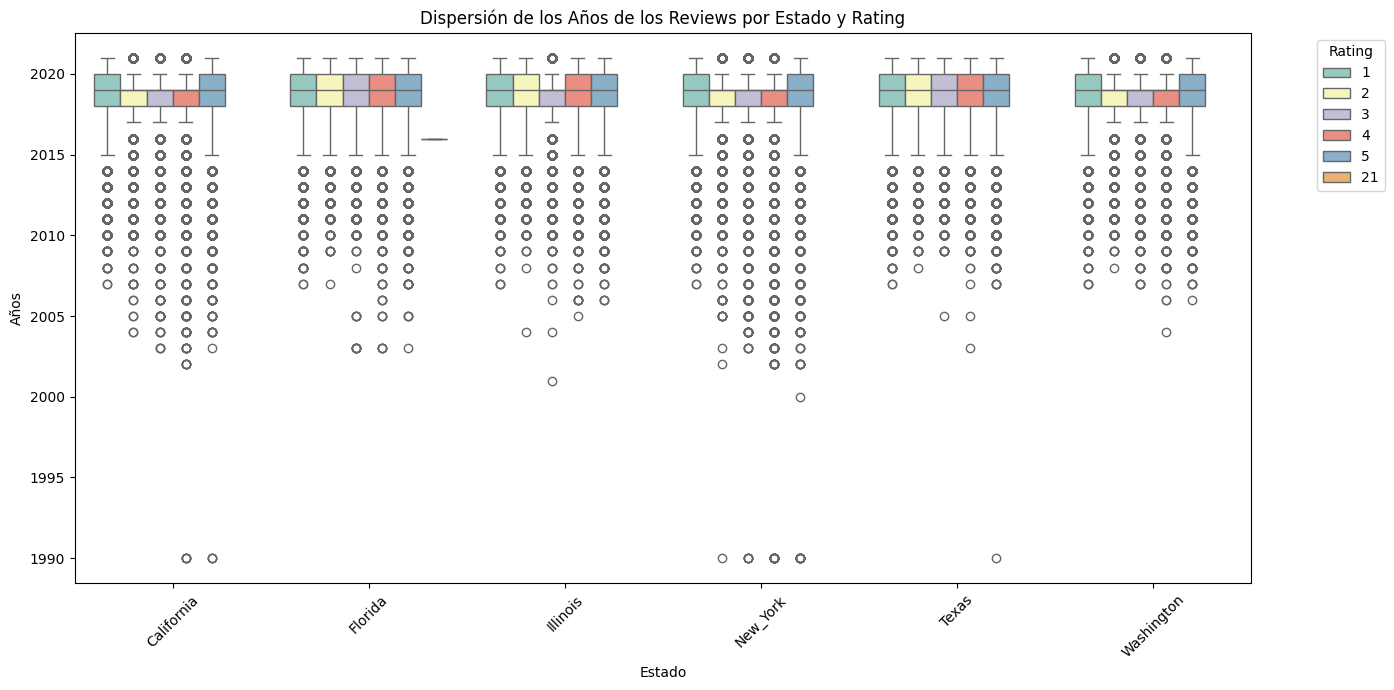

In [46]:
# Crear el boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='state', y='year', hue='rating', data=google_reviews, palette='Set3')

# Ajustar el título y las etiquetas
plt.title('Dispersión de los Años de los Reviews por Estado y Rating')
plt.xlabel('Estado')
plt.ylabel('Años')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [50]:
# Agrupar por estado para contar el número de reviews y calcular el promedio de rating
state_summary = google_reviews.groupby('state').agg(
    review_count=('state', 'size'),
    average_rating=('rating', 'mean')
).reset_index()

# Ordenar por el número de reviews
state_summary = state_summary.sort_values(by='review_count', ascending=False)

# Mostrar el resumen
print(state_summary)

        state  review_count  average_rating
1     Florida       2730604        4.315401
3    New_York       2640663        4.303740
0  California       2624757        4.314976
4       Texas       2235440        4.271316
2    Illinois       2053740        4.314209
5  Washington       1906428        4.339244


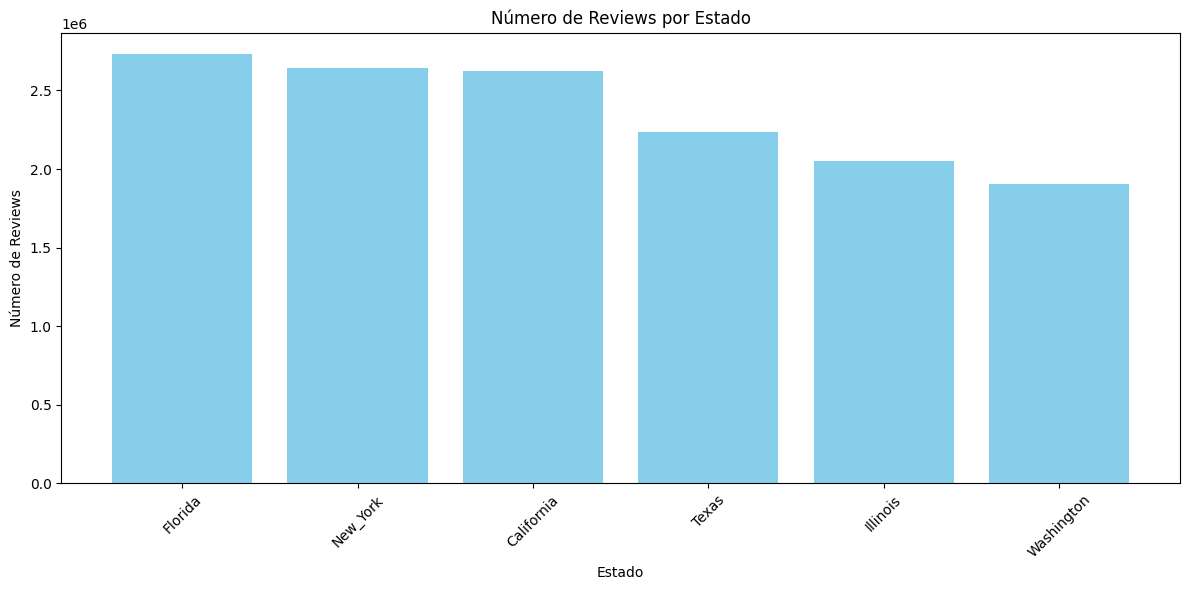

In [51]:
# Crear el gráfico de barras para el número de reviews por estado
plt.figure(figsize=(12, 6))
plt.bar(state_summary['state'], state_summary['review_count'], color='skyblue')
plt.xlabel('Estado')
plt.ylabel('Número de Reviews')
plt.title('Número de Reviews por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<br><br>

### GOOGLE LOCALS (METADATA)
<br><br>

In [2]:
google_locals = pd.read_parquet("datasets/metadata_parquet/google_locals.parquet")

In [8]:
google_locals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346707 entries, 0 to 351184
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              346703 non-null  object 
 1   gmap_id           346707 non-null  object 
 2   latitude          346707 non-null  float64
 3   longitude         346707 non-null  float64
 4   category          346444 non-null  object 
 5   avg_rating        346707 non-null  float64
 6   num_of_reviews    346707 non-null  int64  
 7   hours             300254 non-null  object 
 8   MISC              310384 non-null  object 
 9   relative_results  329493 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 29.1+ MB


In [122]:
google_locals.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,346444.000000,346444.000000,346444.000000,346444.000000
mean,36.343716,-95.706928,4.293090,84.456310
std,6.332411,17.687919,0.566548,218.637052
min,24.545612,-124.731542,1.000000,5.000000
25%,30.310395,-117.668603,4.000000,27.000000
50%,36.737752,-90.328888,4.400000,44.000000
75%,41.575787,-80.385393,4.700000,78.000000
max,49.001902,-71.857288,5.000000,9998.000000


In [115]:
# CREAR LA COLUMNA STATE EN google_locals USANDO LA RELACION CON google_reviews A TRAVES DEL CAMPO gmap_id

gmap_california = google_reviews[google_reviews["state"]=="California"]["gmap_id"]
gmap_florida = google_reviews[google_reviews["state"]=="Florida"]["gmap_id"]
gmap_illinois = google_reviews[google_reviews["state"]=="Illinois"]["gmap_id"]
gmap_newyork = google_reviews[google_reviews["state"]=="New_York"]["gmap_id"]
gmap_texas = google_reviews[google_reviews["state"]=="Texas"]["gmap_id"]
gmap_washington = google_reviews[google_reviews["state"]=="Washington"]["gmap_id"]

google_locals["state"]="SD"

google_locals[google_locals["gmap_id"]==gmap_california]["state"]="California"
google_locals[google_locals["gmap_id"]==gmap_florida]["state"]="Florida"
google_locals[google_locals["gmap_id"]==gmap_illinois]["state"]="Illinois"
google_locals[google_locals["gmap_id"]==gmap_newyork]["state"]="New_York"
google_locals[google_locals["gmap_id"]==gmap_texas]["state"]="Texas"
google_locals[google_locals["gmap_id"]==gmap_washington]["state"]="Washington"

google_locals.loc[google_locals["gmap_id"].isin(gmap_california), "state"] = "California"
google_locals.loc[google_locals["gmap_id"].isin(gmap_florida), "state"] = "Florida"
google_locals.loc[google_locals["gmap_id"].isin(gmap_texas), "state"] = "Texas"
google_locals.loc[google_locals["gmap_id"].isin(gmap_newyork), "state"] = "New_York"
google_locals.loc[google_locals["gmap_id"].isin(gmap_illinois), "state"] = "Illinois"
google_locals.loc[google_locals["gmap_id"].isin(gmap_washington), "state"] = "Washington"

google_locals["state"].value_counts()

state
California    73334
New_York      70408
Texas         67586
Florida       59169
Illinois      45140
Washington    30807
Name: count, dtype: int64

1. Borrar registros con valores nulos en la categoría (son solo 263)
2. Convertir el campo category a lista para luego aplicarle una función


In [ ]:
type(google_locals["category"][1])

numpy.ndarray

In [ ]:
google_locals['category'] = google_locals['category'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

In [71]:
type(google_locals["category"][1])

list

In [ ]:
google_locals.isnull().sum()

In [34]:
google_locals.dropna(subset=["category"], inplace=True)
google_locals["category"].isnull().sum()

In [116]:
# Filtrar los registros que contienen "restaurant" en el campo `category`
# Usamos una función lambda para verificar si "restaurant" está en cualquiera de las categorías (sin importar mayúsculas o minúsculas)
restaurant = google_locals[google_locals['category'].apply(lambda categories: any('restaurant' in category.lower() for category in categories))]

In [119]:
restaurant["state"].value_counts()

state
New_York      12333
California     8777
Texas          5949
Illinois       5875
Florida        5224
Washington     3240
Name: count, dtype: int64

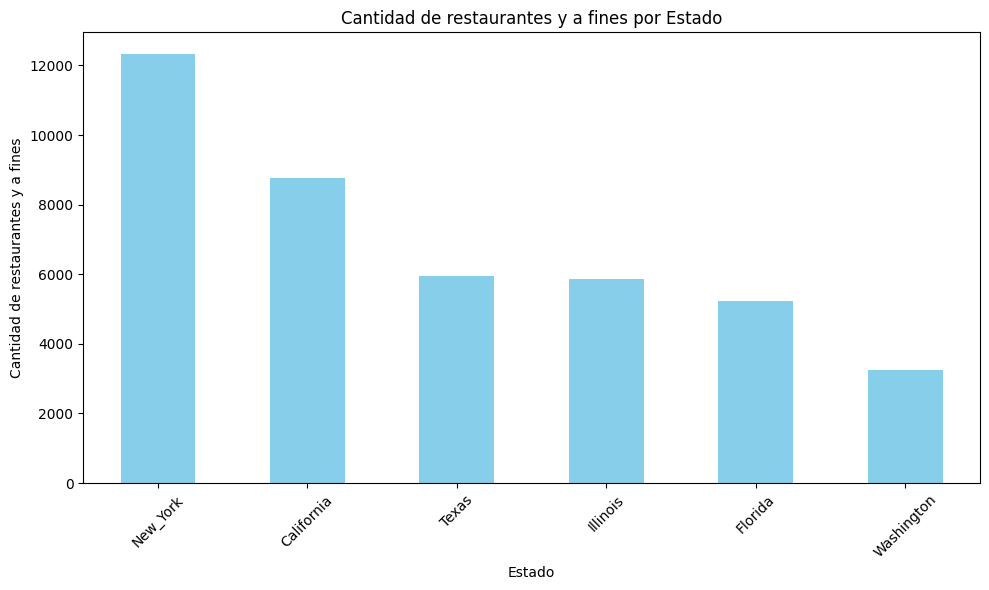

In [120]:
state_counts = restaurant["state"].value_counts()
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura

state_counts.plot(kind='bar', color='skyblue')  # Graficar como gráfico de barras
plt.title('Cantidad de restaurantes y a fines por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de restaurantes y a fines')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

In [77]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41398 entries, 0 to 351164
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              41398 non-null  object 
 1   gmap_id           41398 non-null  object 
 2   latitude          41398 non-null  float64
 3   longitude         41398 non-null  float64
 4   category          41398 non-null  object 
 5   avg_rating        41398 non-null  float64
 6   num_of_reviews    41398 non-null  int64  
 7   hours             39114 non-null  object 
 8   MISC              41222 non-null  object 
 9   relative_results  35243 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


In [78]:
# Crear una lista de todas las categorías que contienen 'restaurant'
restaurant_categories = [category for sublist in restaurant['category'] 
                         for category in sublist if 'restaurant' in category.lower()]

# Contar las categorías únicas que contienen 'restaurant'
unique_restaurant_categories = set(restaurant_categories)
num_unique_restaurant_categories = len(unique_restaurant_categories)

# Mostrar las categorías únicas que contienen 'restaurant' y su conteo
print("Categorías únicas que contienen 'restaurant':")
print(unique_restaurant_categories)
print(f"Número total de categorías únicas que contienen 'restaurant': {num_unique_restaurant_categories}")

# Contar la frecuencia de cada categoría que contiene 'restaurant'
from collections import Counter

restaurant_category_count = Counter(restaurant_categories)

print("\nFrecuencia de cada categoría que contiene 'restaurant':")
print(restaurant_category_count)

Categorías únicas que contienen 'restaurant':
{'Macrobiotic restaurant', 'Fish & chips restaurant', 'Indian restaurant', 'French restaurant', 'Gluten-free restaurant', 'Israeli restaurant', 'Taiwanese restaurant', 'Oaxacan restaurant', 'Seafood restaurant', 'Austrian restaurant', 'Yucatan restaurant', 'Catalonian restaurant', 'Polynesian restaurant', 'Canadian restaurant', 'Mediterranean restaurant', 'Chicken wings restaurant', 'Floridian restaurant', 'Buffet restaurant', 'Pancake restaurant', 'Welsh restaurant', 'Momo restaurant', 'Hakka restaurant', 'Asian fusion restaurant', 'Scandinavian restaurant', 'Hoagie restaurant', 'Po’ boys restaurant', 'American restaurant', 'European restaurant', 'Southern Italian restaurant', 'Peruvian restaurant', 'East African restaurant', 'French steakhouse restaurant', 'Icelandic restaurant', 'Jewish restaurant', 'Pacific Northwest restaurant (US)', 'Biryani restaurant', 'Portuguese restaurant', 'Haitian restaurant', 'Pizza restaurant', 'Seafood donbu

In [193]:
restaurant.loc[:,["avg_rating","num_of_reviews"]].describe()

,avg_rating,num_of_reviews
count,41398.000000,41398.000000
mean,4.180448,149.399826
std,0.462796,362.603685
min,1.300000,5.000000
25%,3.900000,34.000000
50%,4.300000,56.000000
75%,4.500000,107.000000
max,5.000000,9998.000000


In [80]:
google_locals.isnull().sum()

name                    4
gmap_id                 0
latitude                0
longitude               0
category                0
avg_rating              0
num_of_reviews          0
hours               46321
MISC                36060
relative_results    17172
dtype: int64

In [93]:
restaurant["category"].value_counts()[restaurant["category"].value_counts() > 300]

category
[Restaurant]                                                                                                     5505
[Mexican restaurant]                                                                                             2236
[Sandwich shop, Caterer, Fast food restaurant, Takeout Restaurant, Restaurant]                                   1546
[Chinese restaurant]                                                                                             1075
[Pizza restaurant]                                                                                               1063
[American restaurant]                                                                                             664
[Chinese restaurant, Delivery Restaurant]                                                                         450
[Coffee shop, Bagel shop, Bakery, Breakfast restaurant, Donut shop, Fast food restaurant, Takeout Restaurant]     427
[Italian restaurant]                           

In [85]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41398 entries, 0 to 351164
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              41398 non-null  object 
 1   gmap_id           41398 non-null  object 
 2   latitude          41398 non-null  float64
 3   longitude         41398 non-null  float64
 4   category          41398 non-null  object 
 5   avg_rating        41398 non-null  float64
 6   num_of_reviews    41398 non-null  int64  
 7   hours             39114 non-null  object 
 8   MISC              41222 non-null  object 
 9   relative_results  35243 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


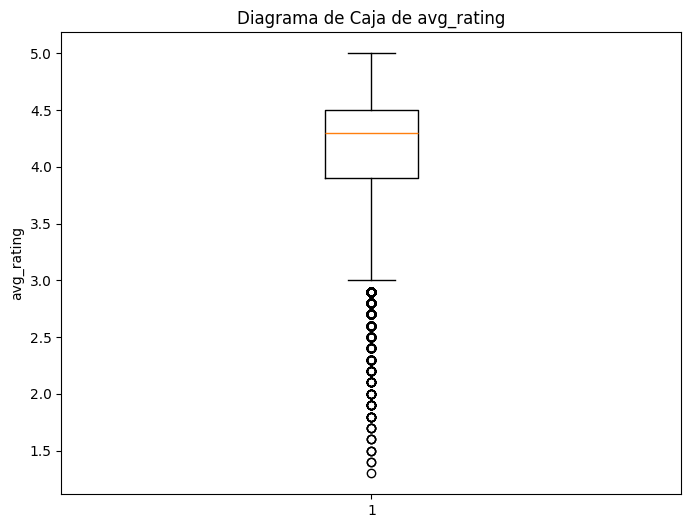

Outliers en avg_rating:
                                             name  avg_rating  num_of_reviews
610     Southern Girls Food & Music For Your Soul         2.9              48
860                               Stewart's Shops         2.2              15
868                                    McDonald's         2.4              48
1119                              Flock and Stock         2.8              52
1165                                   McDonald's         2.2              18
...                                           ...         ...             ...
348778                             Savory Kitchen         2.8              18
349959                         Trail Head BBQ Bar         2.8              44
350067                                  Thorntons         2.8              17
350242                                     Subway         2.7              53
350437                                 China Star         2.9              64

[726 rows x 3 columns]


In [124]:
# Diagrama de caja para avg_rating
plt.figure(figsize=(8, 6))
plt.boxplot(restaurant['avg_rating'])
plt.title('Diagrama de Caja de avg_rating')
plt.ylabel('avg_rating')
plt.show()

# Calcular el rango intercuartílico (IQR) para identificar outliers
Q1 = restaurant['avg_rating'].quantile(0.25)
Q3 = restaurant['avg_rating'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_avg_rating = restaurant[(restaurant['avg_rating'] < lower_limit) | (restaurant['avg_rating'] > upper_limit)]

# Mostrar los outliers
print("Outliers en avg_rating:")
print(outliers_avg_rating[['name', 'avg_rating', 'num_of_reviews']])

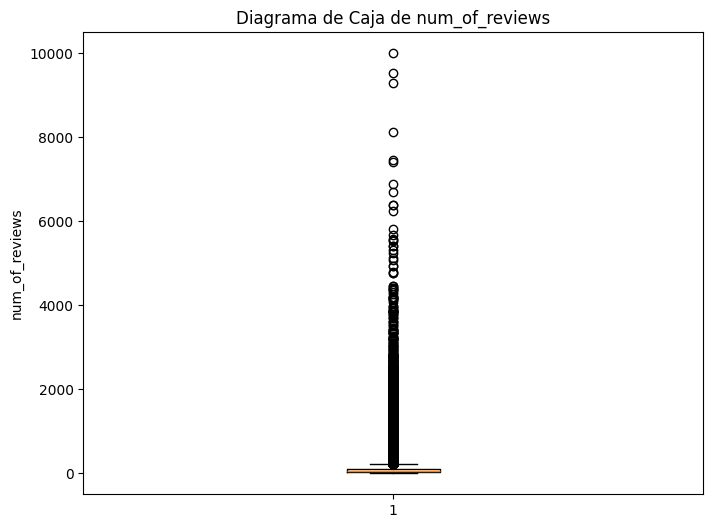

Outliers en num_of_reviews:
                                     name  avg_rating  num_of_reviews
9065                               Zorbas         4.5             257
19508                            Idyology         4.2             246
22066                       Zócalo Folsom         4.0             256
23783   El Buen Gusto Restaurant & Bakery         4.2             355
25033         Sealand Seafood Steak & Pho         4.2             374
...                                   ...         ...             ...
351033        Fatty Fish Sushi Restaurant         4.6             338
351044          LaGondola Spaghetti House         4.2             228
351065    Charlie Fox's Pizzeria & Eatery         4.5             217
351130            Enrico's Italian Dining         4.4             344
351133           Frank's Shrimp & Chicken         4.7             318

[4715 rows x 3 columns]


In [125]:
# Diagrama de caja para num_of_reviews
plt.figure(figsize=(8, 6))
plt.boxplot(restaurant['num_of_reviews'])
plt.title('Diagrama de Caja de num_of_reviews')
plt.ylabel('num_of_reviews')
plt.show()

# Calcular el rango intercuartílico (IQR) para identificar outliers
Q1 = restaurant['num_of_reviews'].quantile(0.25)
Q3 = restaurant['num_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar outliers
outliers_num_of_reviews = restaurant[(restaurant['num_of_reviews'] < lower_limit) | (restaurant['num_of_reviews'] > upper_limit)]

# Mostrar los outliers
print("Outliers en num_of_reviews:")
print(outliers_num_of_reviews[['name', 'avg_rating', 'num_of_reviews']])

In [143]:
restaurant[(restaurant['num_of_reviews'] > 1000) & (restaurant['avg_rating'] > 4.5)]["state"].value_counts()

state
Florida       60
California    29
Texas         20
Illinois      14
New_York       9
Washington     7
Name: count, dtype: int64

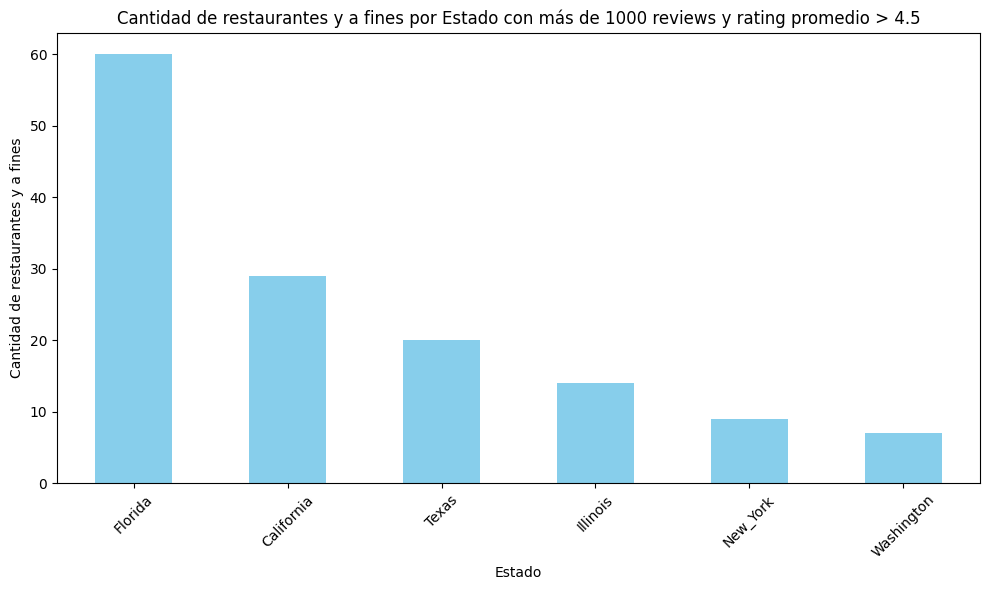

In [146]:
filtered_data = restaurant[(restaurant['num_of_reviews'] > 1000) & (restaurant['avg_rating'] > 4.5)]
state_counts = filtered_data['state'].value_counts()

plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de restaurantes y a fines por Estado con más de 1000 reviews y rating promedio > 4.5')
plt.xlabel('Estado')
plt.ylabel('Cantidad de restaurantes y a fines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

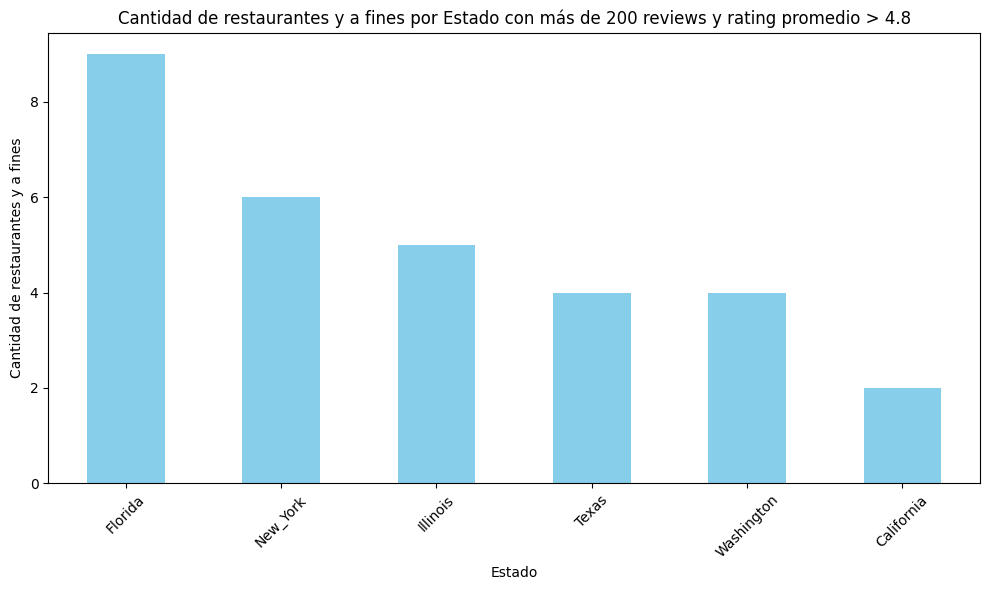

In [170]:
filtered_data = restaurant[(restaurant['num_of_reviews'] > 200) & (restaurant['avg_rating'] > 4.8)]
state_counts = filtered_data['state'].value_counts()

plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de restaurantes y a fines por Estado con más de 200 reviews y rating promedio > 4.8')
plt.xlabel('Estado')
plt.ylabel('Cantidad de restaurantes y a fines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Intel\AppData\Local\Temp\ipykernel_7708\845478662.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


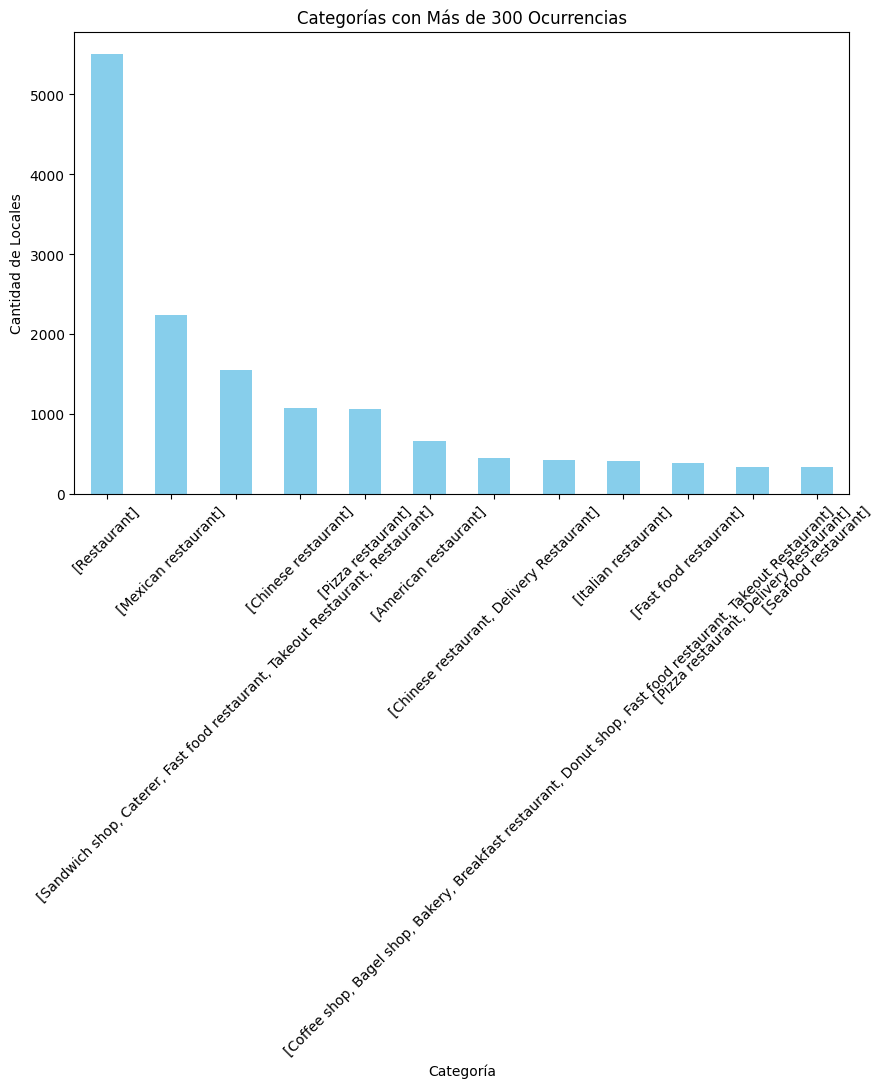

In [151]:
category_counts = restaurant['category'].value_counts()
filtered_categories = category_counts[category_counts > 300]

# Graficar las categorías que tienen más de 300 ocurrencias
plt.figure(figsize=(10, 6))
filtered_categories.plot(kind='bar', color='skyblue')
plt.title('Categorías con Más de 300 Ocurrencias')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Locales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

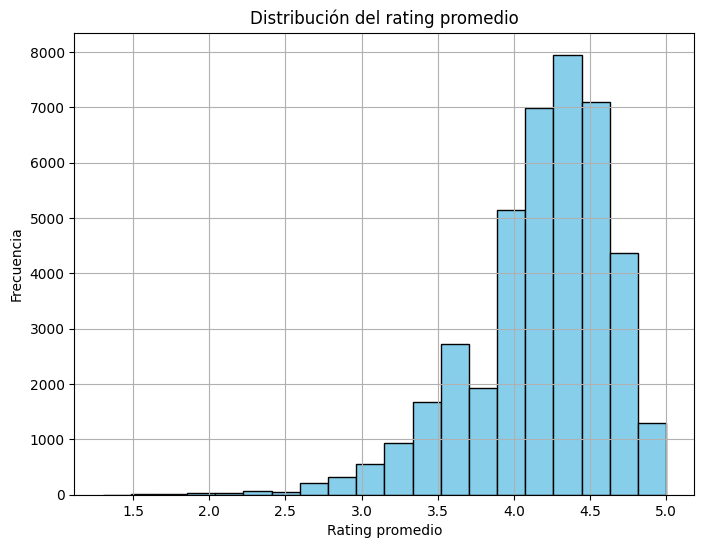

In [171]:
# Graficar histograma de avg_rating
plt.figure(figsize=(8, 6))
plt.hist(restaurant['avg_rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del rating promedio')
plt.xlabel('Rating promedio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

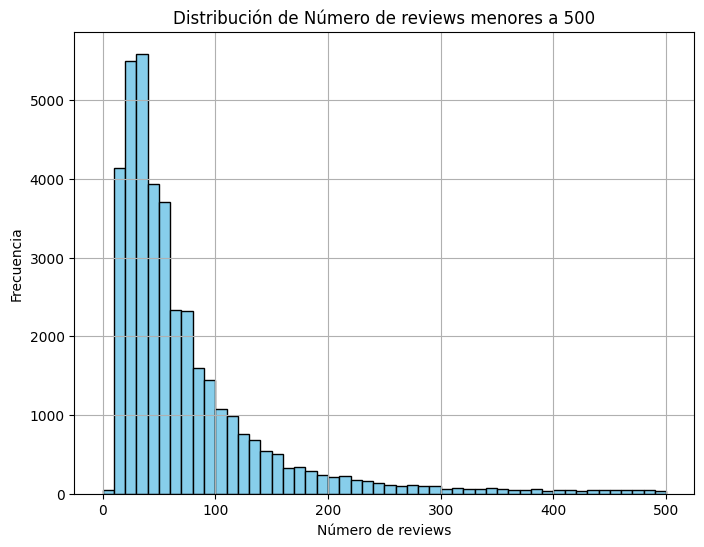

In [184]:
# Graficar histograma de num_of_reviews
plt.figure(figsize=(8, 6))
plt.hist(restaurant['num_of_reviews'], bins=50, range=(0, 500), color='skyblue', edgecolor='black')
plt.title('Distribución de Número de reviews menores a 500')
plt.xlabel('Número de reviews')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()